# Image Transformations

For this project, we are using the [COVID-19 CT segmentation dataset][dataset]. This notebook will explain the transformation applied to the images to make it easier to work with them. Feel free to question any conclusions raised here, as they can be wrong.

The following is slice 122 of the CT **coronacases_001.nii.gz** loaded with [ImageJ][imagej]:

![Slice 122 of the CT **coronacases_001.nii.gz**](images/ct_original_imagej.png "Slice 122 of the CT **coronacases_001.nii.gz**")

As you can see, it is rotated 180º: the curve shape at the top is the bed. It is not mirrored, as the heart (between the two lungs) is slightly to the left of the body after rotating it back.

[dataset]: https://medicalsegmentation.com/covid19/ "COVID-19 CT segmentation dataset"
[imagej]: https://imagej.net/ij/index.html "Public domain software for processing and analyzing scientific images"

## CT Slice Transformations

Let’s see how CT slices are displayed when loading them from Python. We are going to load the same slice from the CT. This CT has been transformed from NIfTI to NumPy using the Python script **nifti_to_numpy.py**. First, we load the slice:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

image_slice = np.load('coronacases_001_image_slice_122.npy')
image_slice.shape

(512, 512)

Then, we show it:

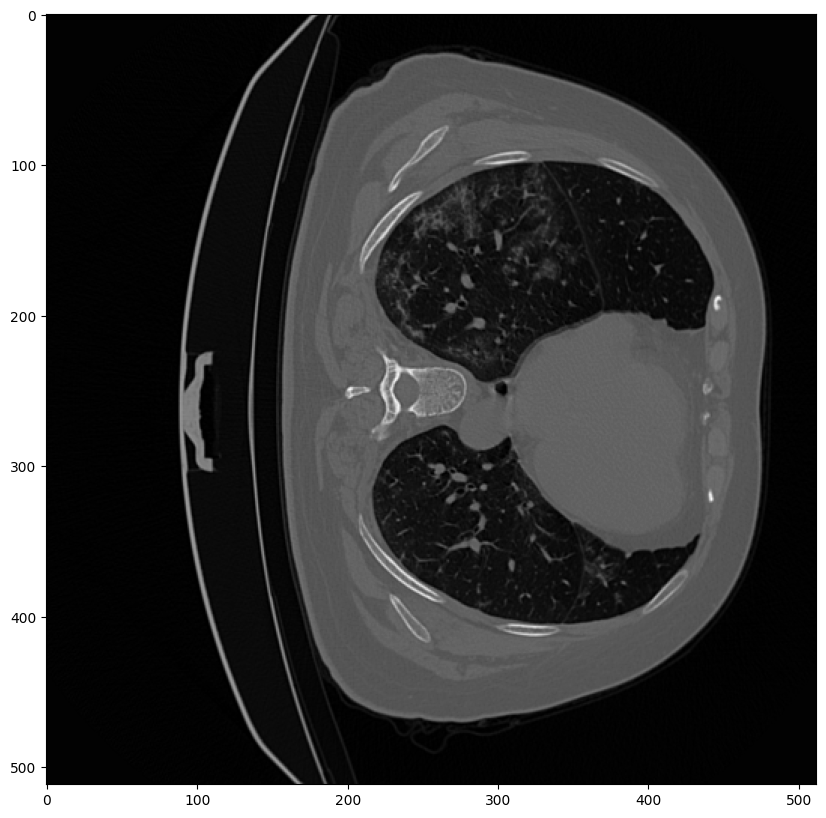

In [2]:
plt.figure(figsize=(10, 10))
plt.style.use('grayscale')
plt.imshow(image_slice)
plt.show()

At first glance, you could be tempted to think the slice is rotated, but look at the bump between the lungs and compare it with the previous image: it is mirrored. This is a result of the way NumPy stores arrays, first rows (y), then columns (x). This can be solved by transposing the image, that is, swapping rows for columns:

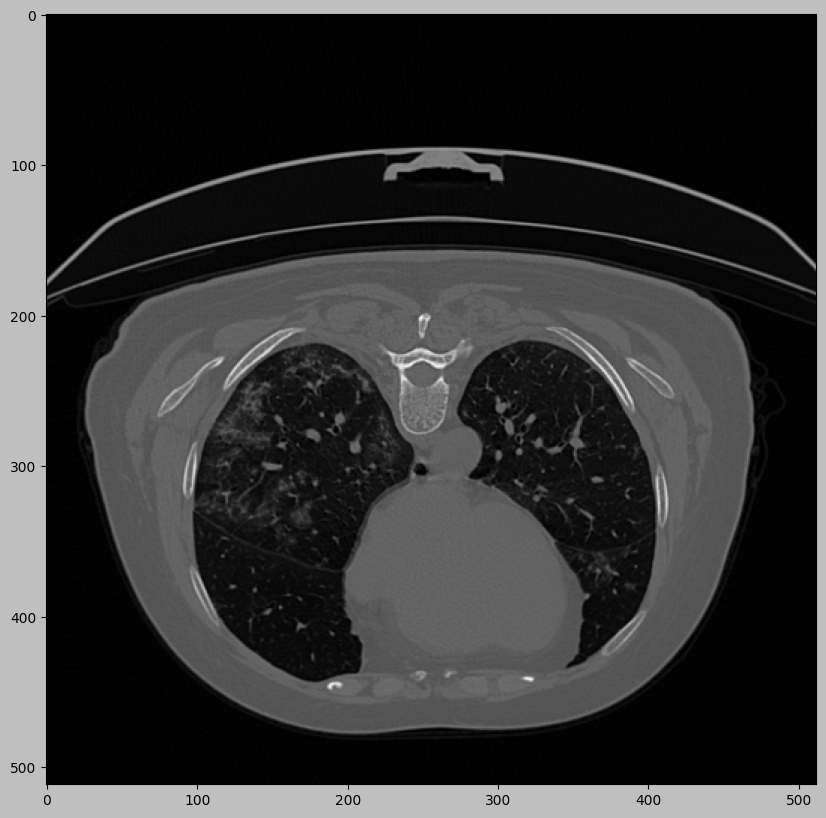

In [3]:
image_slice = image_slice.swapaxes(0, 1)

plt.figure(figsize=(10, 10))
plt.style.use('grayscale')
plt.imshow(image_slice)
plt.show()

The slice loaded via Python now looks identical to the one loaded via ImageJ. The last step would be rotating the image 180º:

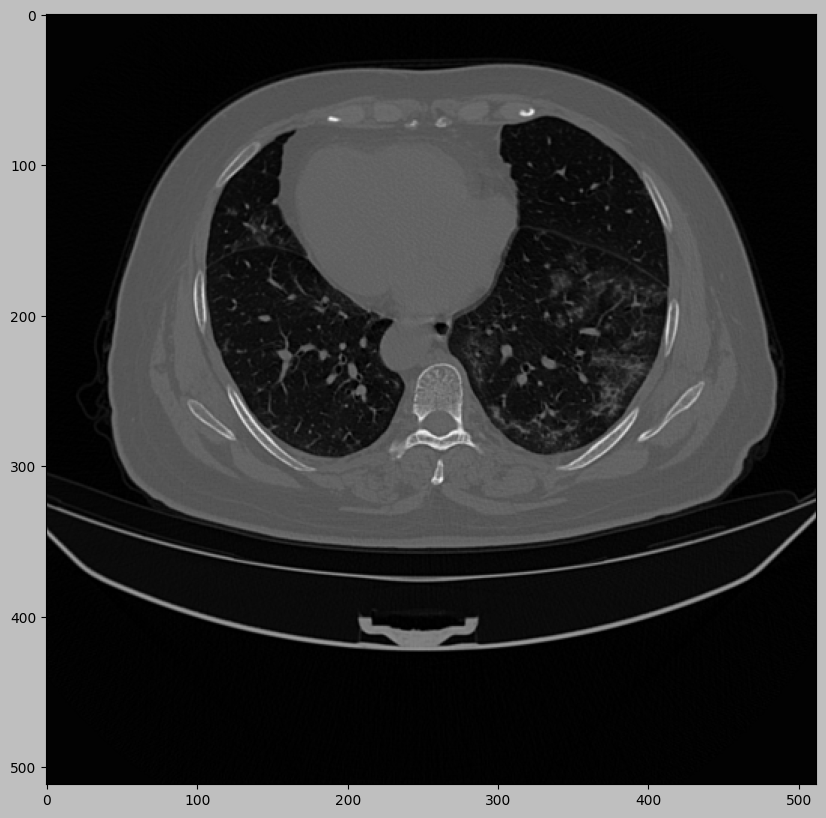

In [5]:
image_slice = np.rot90(image_slice, k=2, axes=(0, 1))

plt.figure(figsize=(10, 10))
plt.style.use('grayscale')
plt.imshow(image_slice)
plt.show()

Now the CT looks right. This means that, in this case, we have to transpose the image and then rotate it 180º. As so, the Python script **nifti_to_numpy.py** has parameters that perform these operations if present.

## Masks Transformations

Let's follow the same steps with the corresponding masks, starting with the load of the file:

In [6]:
masks_slice = np.load('coronacases_001_masks_slice_122.npy')
masks_slice.shape

(512, 512)

Let's take a look at these masks:

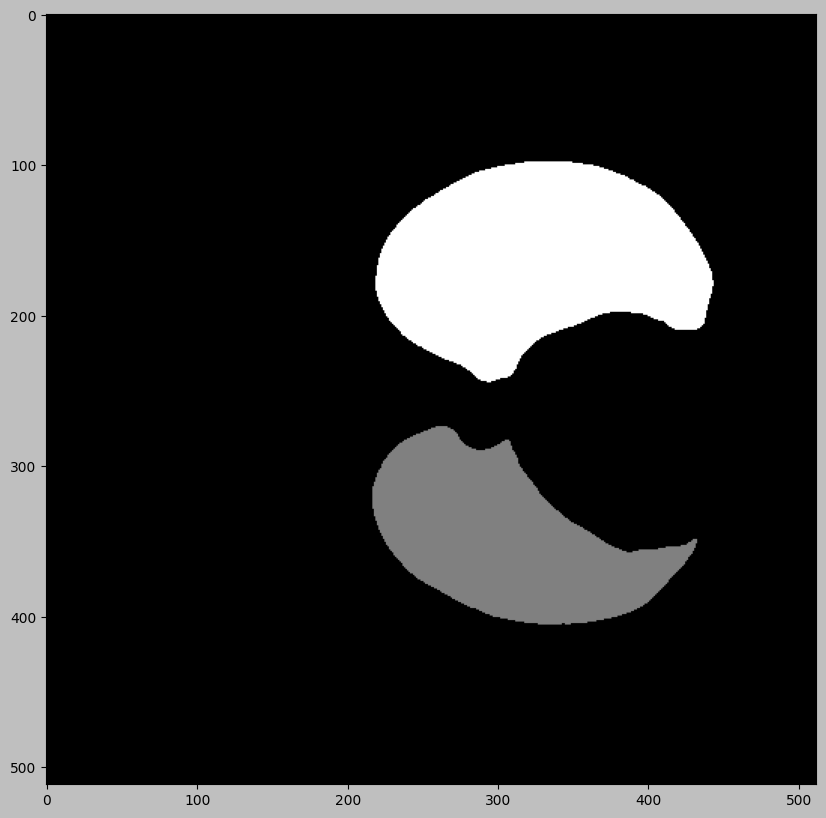

In [7]:
plt.figure(figsize=(10, 10))
plt.style.use('grayscale')
plt.imshow(masks_slice)
plt.show()

It seems we are in the same case, so let's try directly to transpose and rotate the masks:

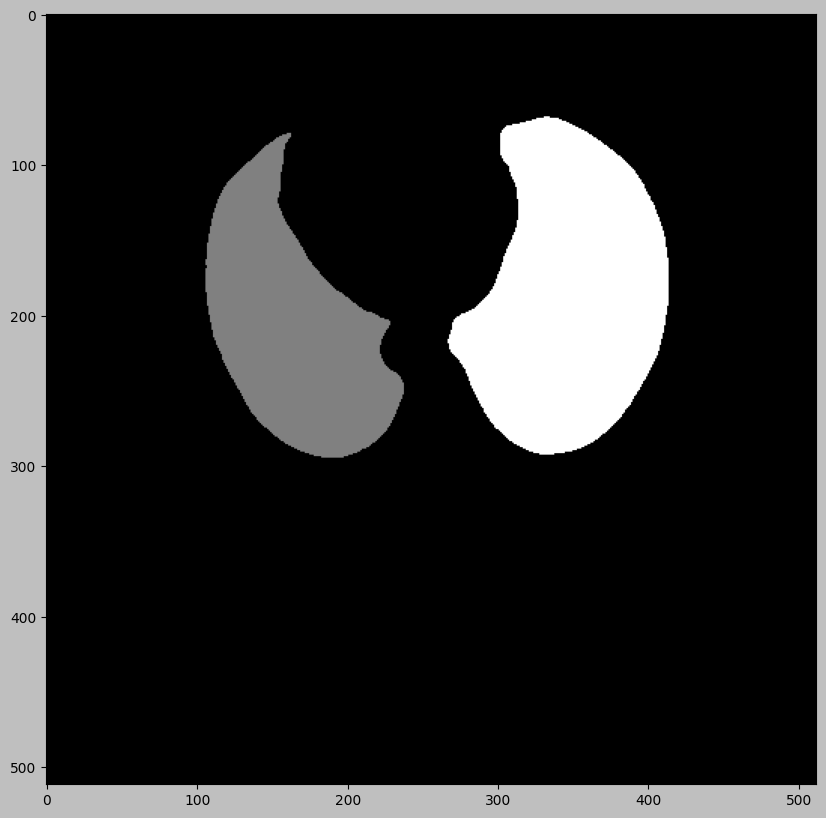

In [8]:
masks_slice = masks_slice.swapaxes(0, 1)
masks_slice = np.rot90(masks_slice, k=2, axes=(0, 1))

plt.figure(figsize=(10, 10))
plt.style.use('grayscale')
plt.imshow(masks_slice)
plt.show()

To check that both image and masks slices are correctly aligned, let's display one on top of the other:

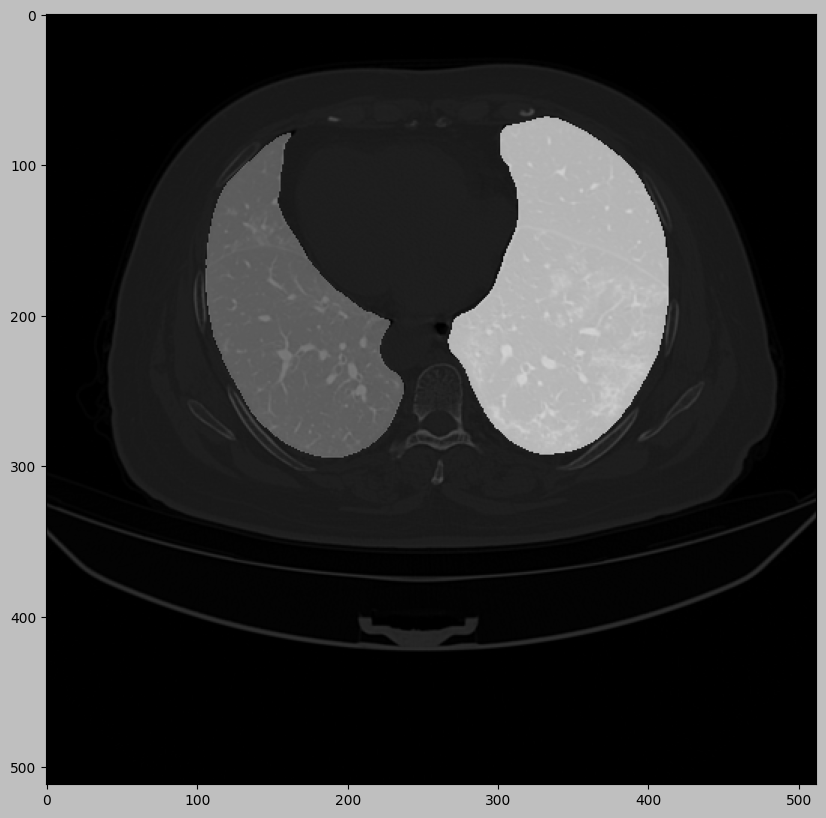

In [9]:
plt.figure(figsize=(10, 10))
plt.style.use('grayscale')
plt.imshow(image_slice)
plt.gca().imshow(masks_slice, alpha=0.7)
plt.show()

So, in summary, this particular instance if image and masks must be transposed and rotated 180º beforehand if we want to display it correctly.
